# Agregacija združevanje in tranformacija podatkov

## Data Aggregation

### Introduction to the Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [3]:
happiness2015[:5]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

### Aggregate Data with Loops

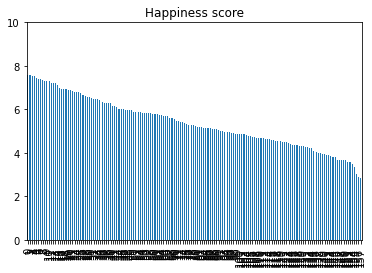

In [7]:
happiness2015["Happiness Score"].plot(kind="bar", title="Happiness score", ylim=(0,10))
plt.show()

In [8]:
happiness2015["Region"].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [9]:
so_asia = happiness2015[happiness2015["Region"] == 'Southern Asia']

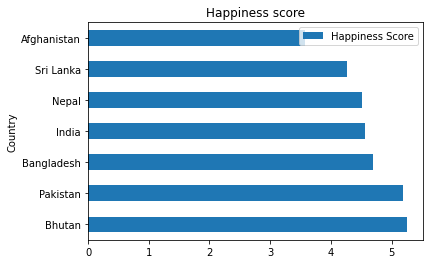

In [13]:
so_asia.plot(x="Country", y="Happiness Score", kind="barh", title="Happiness score", ylim=(0,10))
plt.show()

In [14]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

In [15]:
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

### GroupBy Operation

<img src="./images/split_apply_combine.svg">

#### Creating GroupBy Objects

<img src="./images/Groups.svg">

In [18]:
happiness2015.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

In [19]:
happiness2015.groupby("Region")["Happiness Score"].max()

Region
Australia and New Zealand          7.286
Central and Eastern Europe         6.505
Eastern Asia                       6.298
Latin America and Caribbean        7.226
Middle East and Northern Africa    7.278
North America                      7.427
Southeastern Asia                  6.798
Southern Asia                      5.253
Sub-Saharan Africa                 5.477
Western Europe                     7.587
Name: Happiness Score, dtype: float64

In [20]:
happiness2015.groupby("Region").min()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,,
Australia and New Zealand,Australia,9,7.284,0.03371,1.25018,1.30923,0.90837,0.63938,0.35637,0.43562,2.26425
Central and Eastern Europe,Albania,31,4.218,0.03135,0.39047,0.38562,0.53886,0.09245,0.00227,0.00199,0.89991
Eastern Asia,China,38,4.874,0.02424,0.82819,0.94675,0.60268,0.33208,0.02666,0.08185,0.65429
Latin America and Caribbean,Argentina,12,4.518,0.04076,0.26673,0.74302,0.38847,0.24425,0.01140,0.05841,1.21305
Middle East and Northern Africa,Algeria,11,3.006,0.03260,0.54649,0.47489,0.40064,0.00000,0.04582,0.06431,0.32858
North America,Canada,5,7.119,0.03553,1.32629,1.24711,0.86179,0.54604,0.15890,0.40105,2.45176
Southeastern Asia,Cambodia,24,3.819,0.02596,0.27108,0.62736,0.48246,0.44017,0.00000,0.16860,0.98195
Southern Asia,Afghanistan,79,3.575,0.02043,0.31982,0.30285,0.30335,0.12102,0.05907,0.21222,0.67108
Sub-Saharan Africa,Angola,71,2.839,0.03464,0.00000,0.00000,0.00000,0.10081,0.03060,0.06822,0.67042


#### Agg() Method

In [23]:
import numpy as np

In [26]:
def dif(group):
    return (group.max() - group.mean())

In [27]:
happiness2015.groupby("Region")["Happiness Score"].agg([np.mean, np.max, dif])

,mean,amax,dif
Region,,,
Australia and New Zealand,7.285000,7.286,0.001000
Central and Eastern Europe,5.332931,6.505,1.172069
Eastern Asia,5.626167,6.298,0.671833
Latin America and Caribbean,6.144682,7.226,1.081318
Middle East and Northern Africa,5.406900,7.278,1.871100
North America,7.273000,7.427,0.154000
Southeastern Asia,5.317444,6.798,1.480556
Southern Asia,4.580857,5.253,0.672143
Sub-Saharan Africa,4.202800,5.477,1.274200


In [28]:
happiness2015.groupby("Region")["Freedom"].mean().sort_values()

Region
Central and Eastern Europe         0.358269
Middle East and Northern Africa    0.361751
Sub-Saharan Africa                 0.365944
Southern Asia                      0.373337
Eastern Asia                       0.462490
Latin America and Caribbean        0.501740
Western Europe                     0.549926
Southeastern Asia                  0.557104
North America                      0.589505
Australia and New Zealand          0.645310
Name: Freedom, dtype: float64

### Pivot Tables

<img src="./images/PV_Syntax.svg">

## Pandas DataFrame all() Method

## Combining Data

In [1]:
import pandas as pd

happiness2015 = pd.read_csv("data/World_Happiness_2015.csv")
happiness2016 = pd.read_csv("data/World_Happiness_2016.csv")
happiness2017 = pd.read_csv("data/World_Happiness_2017.csv")

In [4]:
happiness2016['Year'] = 2016
happiness2017['Year'] = 2017

### Combining Dataframes with the Concat Function

<img src="./images/Concat_Updated.svg">

<img src="./images/Concat_Axis1.svg">

<img src="./images/Concat_syntax.svg">

In [ ]:
subjects = ['Year','Country','Happiness Score', 'Standard Error']

<img src="./images/Concat_DifShapes.svg">

### Joining Dataframes with the Merge Function

<img src="./images/Merge_link.svg">

<img src="./images/Merge.svg">

<img src="./images/Merge_syntax.svg">

#### Joining on Columns

#### Left Joins

#### Join on Index

<img src="./images/Index.svg">

### Primer: Combine Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th></th>
<th><span style="font-weight:bold">pd.concat()</span></th>
<th><span style="font-weight:bold">pd.merge()</span></th>
</tr>
<tr>
<td><span style="font-style:normal">Default Join Type</span></td>
<td><span style="font-weight:300;font-style:normal">Outer</span></td>
<td><span style="font-weight:300;font-style:normal">Inner</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine More Than Two Dataframes at a Time?</span></td>
<td><span style="font-weight:300;font-style:normal">Yes</span></td>
<td><span style="font-weight:300;font-style:normal">No</span></td>
</tr>
<tr>
<td><span style="font-style:normal">Can Combine Dataframes Vertically</span><br><span style="font-style:normal">(axis=0) or Horizontally (axis=1)?</span><br></td>
<td><span style="font-weight:300;font-style:normal">Both</span></td>
<td><span style="font-weight:300;font-style:normal">Horizontally</span></td>
</tr>
<tr>
<td>Syntax</td>
<td><span style="font-weight:bold">Concat (Vertically)</span><br>concat([df1,df2,df3])<br><br><span style="font-weight:bold">Concat (Horizontally)</span><br>concat([df1,df2,df3], axis = 1)<br><br><br><br></td>
<td><span style="font-weight:bold">Merge (Join on Columns)</span><br>merge(left = df1, right = df2, how = 'join_type', on = 'Col')<br><br><span style="font-weight:bold">Merge (Join on Index)</span><br>merge(left = df1, right = df2, how = 'join_type', left_index = True, right_index = True)<br><br><br><br></td>
</tr>
</tbody></table>


## Transforming Data

In [67]:
happiness2015 = pd.read_csv('data/World_Happiness_2015.csv')

In [68]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [69]:
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

### Map and Apply Methods (Element-wise)

In [73]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'

<img src="./images/Map_generic.svg">

<img src="./images/Map.svg">

### Applymap Method (Element-wise to Multiple Columns)

### Apply Method (along an Axis)

<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
</tbody></table>

<img src="./images/Apply_counts.svg">

In [98]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']




In [101]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

### Melt Function

<img src="./images/Melt_Syntax.svg">

In [107]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

### Primer: Aggregate the Data and Create a Visualization


<table class="tg">
<tbody><tr>
<th><span style="font-weight:bold">Method<br></span></th>
<th><span style="font-weight:bold">Series or Dataframe Method</span></th>
<th><span style="font-weight:bold">Applies Functions Element-wise?</span></th>
</tr>
<tr>
<td>Map</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Series</td>
<td>Yes</td>
</tr>
<tr>
<td>Applymap</td>
<td>Dataframe</td>
<td>Yes</td>
</tr>
<tr>
<td>Apply</td>
<td>Dataframe</td>
<td>No, applies functions along an axis</td>
</tr>
</tbody></table>

## Vaja

In [1]:
import pandas as pd
import json

json_data_path = "./data/honeypot.json"

In [2]:
import re

url_path_regex = re.compile(r"https?:\/\/.+?(\/.*)")

def extract_url_path(full_url: str) -> str:
        if full_url.startswith("/"):
            return full_url
        try:
            return url_path_regex.search(full_url).group(1)
        except AttributeError:
            return "/"